In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=12)  # controls default text sizes
plt.rc('axes', titlesize=16)  # fontsize of the axes title
plt.rc('axes', labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)  # fontsize of the tick labels
plt.rc('ytick', labelsize=14)  # fontsize of the tick labels
plt.rc('legend', fontsize=14)  # legend fontsize

sns.set_context("paper")

In [2]:
counts_df = pd.read_csv('../results/interface_analysis_deduplicated_pairs/num_pathogen_proteins_per_bait.csv')
print(counts_df.shape)
print(counts_df[counts_df['count'] >= 2].shape)

(666, 2)
(90, 2)


       bait  count     gene
0    P06400      8      RB1
1    O60684      6    KPNA6
2    Q05086      6    UBE3A
3    P04637      5     TP53
4    P52294      5    KPNA1
5    P52292      5    KPNA2
6    P01730      4      CD4
7  P63208-1      4     SKP1
8    P63151      4  PPP2R2A


C:\Users\dbaptista\AppData\Local\Temp\ipykernel_21700\1418880208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top9_df['gene'] = top9_df['bait'].map(uniprot_to_gene)


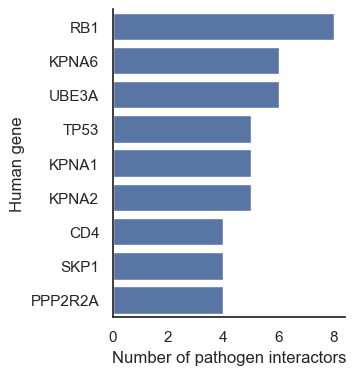

In [3]:
plt.figure(figsize=(3, 4))
sns.set_color_codes("muted")
sns.set_theme(style='white')
top9_df = counts_df[counts_df['count'] >= 4]
uniprot_to_gene = {'P06400': 'RB1', 'O60684': 'KPNA6', 'Q05086': 'UBE3A', 'P04637': 'TP53', 'P52294': 'KPNA1', 'P52292': 'KPNA2',
                  'P01730': 'CD4', 'P63208-1': 'SKP1', 'P63151': 'PPP2R2A'}
top9_df['gene'] = top9_df['bait'].map(uniprot_to_gene)
print(top9_df)
g = sns.barplot(data=top9_df, x='count', y='gene', color='b')
g.set_xlabel('Number of pathogen interactors')
g.set_ylabel('Human gene')
sns.despine()
plt.savefig('../results/plots_apms_hpidb/num_pathogen_interactors_per_bait.svg', bbox_inches='tight')

In [4]:
jaccard_df = pd.read_csv('../results/interface_analysis_deduplicated_pairs/apms_interface_comparison_scores_pathogen_pathogen.csv')
top9 = counts_df.loc[0:8, 'bait'].to_list()
jaccard_df_sel = jaccard_df[jaccard_df['bait'].isin(top9)]

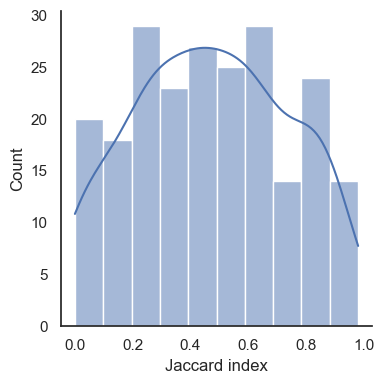

In [5]:
g = sns.displot(jaccard_df['jaccard_index'], kind='hist', kde=True, bins=10, height=4, aspect=1)
g.set_xlabels('Jaccard index')
sns.despine()
plt.savefig('../results/plots_apms_hpidb/jaccard_index_dist.svg', bbox_inches='tight')